# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

You can use `pyarabic` or any other library to pre-process and clean the Arabic text.

In [2]:
!pip install pyarabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.2 MB/s eta 0:00:00


# Download the Dataset

Please note that you are allowed to take a subset of this dataset, the reason for that is it might take a long time to train the model on.

In [3]:
!kaggle datasets download -d khaledzsa/sanad
!unzip sanad.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/sanad
License(s): unknown
 98% 70.0M/71.4M [00:04<00:00, 23.9MB/s]
100% 71.4M/71.4M [00:04<00:00, 17.1MB/s]
Archive:  sanad.zip
  inflating: sanad.csv               


In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_colwidth' , 200)

In [6]:
df = pd.read_csv('/content/sanad.csv')

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [7]:
df.head()

,text,label
0,"https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً""ْبَعيُدْاًّ عن اٌل...",Culture
1,https://example.com/resource/اَنِطٌلقّتَ ٍفٍيّ مثلَ َهًذَه ّالأيِامٌ َمنْ الُعًاْمَ ًالًفائت ٌفعُالْيِاِتَ مهرجاًن دٍبًيُ ًلَمسرٍحٌ ْاَلْشِبّابً،ّ تحت ْمّظًلٌةْ مْجلُس دبي ٌاِلثٌقافي، ْوًكانٍت فكّ...,Culture
2,https://example.com/resource/أُقيًمٌتِ مِساءُ َأمٍسٍ اٌلأَوٌل فيُ ِإكسّبٍو اٍلَشارًقّةٌ نِدٌوُة حوْاٌرَية حوْلِ أُهِمَيًة ًتٌجَاِرِةّ الكتٌب فيُ َالعالِمٍ َشًارك فيهًا ٍكلّ من ليَز ثومسٍوِنِ ًولُو...,Culture
3,https://example.com/resource/بٍاسُمةَ يًوٌنٍس ْحّينًماً قًاْلُ صاحّبَ ُاٌلٌسَمَوِّ ٍاِلشٌيًخٍ ًاْلدْكٍتُور ُسِلطُان ُبْن ًمِحمّد ّالقّاسٌمي عّضو المًجُلسْ ِالأِعلُى حِاٌكم ًالشاٌرقٍة، ٍبَأْن ٌ«اٌل...,Culture
4,https://example.com/resource/قُرر اَتحِاد اًلْأَدًباًءْ ًوالْكِتًّاٌب الموريْتْانييٍنٌ عْقّد مَؤٍتًمرّهٍ َاِلعام ْالتاسُعٍ َفِيِ 1ٌ6 ًإبَرْيل/ُ نِيساًن المّقٌبلَ 2ّ01ً2 ّ.وسيَجرْي َخلٍاّل ّاٌلمؤْت...,Culture


In [8]:
df.tail()

,text,label
39880,https://example.com/resource/أعلّنت شّركٌةً بّاَنِاسٌوَنُيّك عن اٍطَلاّقٌ ّسلُسًلة تلْفًزيوناتّ فييٍرا اُلُجًديدةٍ ًللعٍاًم َ20ً08 بّعدّ طوُلٍ انُتظٍاُر في ّمّنُطًقة ٌالشرْق ّاَلأُوًسطّ،َ واِلتَيٌ...,Tech
39881,https://example.com/resource/بُتٍاَرٌيًخَ 28ْ ُمّارسٍ/ٍآذاٍر الماًضِي وّبَيّن ْالٌسّاعةٌ اُلْثُامنة وِاِلّنَصفٌ ٌمّساءِ ٍوحتَىٍ الٌتًاْسعْة واَلُنْصفً ِمسٍاءٌ،ْ ساّهم ِآَلاِف ٌالأٍشُخًاص فٌي ٌاَلْ...,Tech
39882,https://example.com/resource/دبَيُ:َ «ُاَلخليجٍ» أَبرٍمِت بلدّية دبِيٌ مع بلدٍيَة رًأُسْ ُاَلخِيَمةُ اُتَفاِقَية ُمُشٌرْوِع َ«َمِكْاٌنيٍ» لُلّعنٍونِة ْالًجغْراِفْية، وجًاءْ ِذَلٌك عْلِىْ هاِمشَ ٍف...,Tech
39883,https://example.com/resource/LٌG GًS2ْ9ً0 Coْoْkِie Frْesًhُهٍاْتًف متحرّك ٌجديٌد مُن ُإًنتُاِجُ (إّل ٌجي)،ٍ ْيٌحتوي ْعٍلًى حساس لِلَحّركة ُAٍccelْeِroُmeterٌ وهذٌاَ الهٍاتِف لمً يُطرٍح بَعدّ فُيِ...,Tech
39884,https://example.com/resource/تنطًلقٍ اٌليومّ َفّيٍ مركَزٌ ٍمعارضُ ًمُطار دبًي اُلدوَرة اٍلَ ِ21ٌ ّلْمَعرضْ ٍجَيتِكٍسٌ شٍوبر ،ّ20ُ1ٍ1 َالذّيُ ُيًواًصِلَ اسَتًقباّل ُاْلُمٍتَسٍوقينْ مٍنً ًاًلدولة وّ...,Tech


In [9]:
df.label.value_counts()

,count
label,
Politics,6334
Medical,6292
Culture,6098
Finance,6095
Tech,5979
Sports,5859
Religion,3228


In [10]:
df[:6098]

,text,label
0,"https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً""ْبَعيُدْاًّ عن اٌل...",Culture
1,https://example.com/resource/اَنِطٌلقّتَ ٍفٍيّ مثلَ َهًذَه ّالأيِامٌ َمنْ الُعًاْمَ ًالًفائت ٌفعُالْيِاِتَ مهرجاًن دٍبًيُ ًلَمسرٍحٌ ْاَلْشِبّابً،ّ تحت ْمّظًلٌةْ مْجلُس دبي ٌاِلثٌقافي، ْوًكانٍت فكّ...,Culture
2,https://example.com/resource/أُقيًمٌتِ مِساءُ َأمٍسٍ اٌلأَوٌل فيُ ِإكسّبٍو اٍلَشارًقّةٌ نِدٌوُة حوْاٌرَية حوْلِ أُهِمَيًة ًتٌجَاِرِةّ الكتٌب فيُ َالعالِمٍ َشًارك فيهًا ٍكلّ من ليَز ثومسٍوِنِ ًولُو...,Culture
3,https://example.com/resource/بٍاسُمةَ يًوٌنٍس ْحّينًماً قًاْلُ صاحّبَ ُاٌلٌسَمَوِّ ٍاِلشٌيًخٍ ًاْلدْكٍتُور ُسِلطُان ُبْن ًمِحمّد ّالقّاسٌمي عّضو المًجُلسْ ِالأِعلُى حِاٌكم ًالشاٌرقٍة، ٍبَأْن ٌ«اٌل...,Culture
4,https://example.com/resource/قُرر اَتحِاد اًلْأَدًباًءْ ًوالْكِتًّاٌب الموريْتْانييٍنٌ عْقّد مَؤٍتًمرّهٍ َاِلعام ْالتاسُعٍ َفِيِ 1ٌ6 ًإبَرْيل/ُ نِيساًن المّقٌبلَ 2ّ01ً2 ّ.وسيَجرْي َخلٍاّل ّاٌلمؤْت...,Culture
...,...,...
6093,https://example.com/resource/ببِساًطة ْناْدَرٌة يْقٌوٌلِ ُإمٌبًرتوُ إيكو فِيَ ْكتٌاْبْ دروسً فْي الٌأٍخلًاقُ:ّ ًمن اٍلمْعْروف ِأن ٍالُمًثقّفين ًباعَتُباّرهمِ فٍئةٍ يٌحِيًلْوٌن عٌلّىَ ِشيء غامضٌ، أ...,Culture
6094,"https://example.com/resource/عّمّْْاِنً ٍ- ْ""ّالخُلٍيْج""َ:َتٌنطلْق ُفيُ 6ّ أغسطًس ّ/آَب َالمقٌبّلْ ٌفعٍالّيَاّت الدورُة ِالراٌبعُة ٍوالَعشٍرين ِلمهرجِاٌنٍ َالفَحّيّص ّاًلثقِاٍفٌي اّلفني تْحت ًشعاِ...",Culture
6095,"https://example.com/resource/الِشَاِرًقةٍ ّ- ً""ٍالخلٌيجً"":ّاْنٌطلٌق ْمٌساء أًمسْ ًاِلْأْوًل ُفٍيٌ ُمّرَكّزِ ًاِلِأُميرَ عبدٌاِلَمحًسنٌ بَن جلويْ َلَلبحِوث واًلدٍراُسات اّلِإسلاميْة فٍيِ َالَشارقةْ...",Culture
6096,https://example.com/resource/صدْرٍ عٌن ٌالِهٍيئّةً ٍالّمًصرَيَةً ْاّلعِاِمةّ َلٍلّكٌتاب،ٌ ْفيْ سلسٍلّة ًتْاريخَ ْاّلِمصّرٌيٍين كتًابٌ ٍبِعَنًواْن ٌ«جاُمع عمِرو ِبُنّ ِاِلُعاْص ُوالٌحياُة َاُلثقاَف...,Culture


In [11]:
df[6099:6099+6095] #data is organized

,text,label
6099,https://example.com/resource/واُصُلِتٌ ْاٍلّأّسَهمَ ُاَلِمحلًيًة اَلتَرًاٌجُعٍ ٌلٌلَيوم الثاّنْي عْلْى الّتوالِي معٌ ارًتفاع عِرَوْضً الِبيْعُ، ًحّيَثِ ُانخِفض ّمؤُشرٌ ّسوقّ اٍلإًماّراْت بٌنُسبةُ ...,Finance
6100,https://example.com/resource/أَبِوُظبٍي -ٍ علي أسعدٍ:ًفقْدت ْاٍلأسٍهّم ّ5ٌ9 .5 ْملًياْر درَهم مٍن قيُمتهّا َاَلْسٌوقِيةِ اَلَتي ْتَراجُعتِ َإّلَىِ ً1ُ8ّ ً.7ّ5ِ2 مٍلّيار درّهمُ ٌتحُتٍ ضَغّط َعمليٌا...,Finance
6101,https://example.com/resource/تّحْوِلٌتٌ اًلٍتٌقِلَبْاٌتٌ ٌالِحادةَ اّلتيِ شٍهِدٌتّهاِ َأِسّعارُ اّلأّسهْمٍ المحلٌيةٌ طَوال ٍاٍلأّسبوعّ ْالُمُاضيَ ًإلى ّحاِلٍةُ ٌمْن اِلَهدوء ًالَنسبًيً أُمسَ مع ًت...,Finance
6102,https://example.com/resource/انخفضّ مًؤًشرِ ٌسوقٌ ُأبوَظًبي ًلّلأًورَاقٌ المْاّلٌية، ِأّمس،ُ بَنًسُبَة 45ٍ َ.0ٌ%ٍ ٍووِصل إلى ْ2421ٍ َنقٌطةِ.َ ّوّبِلغٍ ْإجماًليُ قْيمًةَ اْلأُسٌهم اِلمتدَاولَة، ِأم...,Finance
6103,"https://example.com/resource/أِبوُظبيً ِ-ْ َ""ُالخليجٌ""ّ:ِانْخْفض َمؤّشر سَوقٍ الُإْمٌاراّت الَمالِي اٍلصادًر ٌعن ُهًيْئةَ ْالْأَورٍاًق اِلماليُةُ ٌوالسّلِعُ ٌخلِال جٌلُسةُ ًتِدِاوٍل أٍمُسّ، بَنسِب...",Finance
...,...,...
12189,https://example.com/resource/ارّتَفْع الٍموَشرً َاْلِعاْم فَيَ ْسوقَ أبُوْظبّيٌ ُللُأّورًاق اْلَمٌالُية َأَمًس بٌنسَبةِ 1ْ9َ َ.َ0ِ%ً ٌووَصلٌ إَلى ّ3028ّ نقٍطّةٌ ْ.ّ وٍبلٌغُ إجمالٍيْ ْقِيمة اْلأسَه...,Finance
12190,https://example.com/resource/أًبوّظبي ً-ُ ًعلٍيٌ ٍأسعد:رغْم عِملِيِاْت جُنْي اّلأُربٍاح، وًاصلٌت ُالأِسٌهُم ًالمْحلْيةُ ِتٌحَقِيقَ ٌمزٍيًد ّمن الًمِكاّسّب بٍمقدٌاًر مٍليارٌ ُدرّهٍمٍ،ٍ وٌاَرتْفعتٍ ...,Finance
12191,https://example.com/resource/أقٌرٌت ْالٍجمِعيةِ العمًوٍميٌةً ًالّعٍادًيَة َلِشِرٍكةِ ْاللايّنْسٍ ُللتٌأُمْينَ ٍفيٍ اجٍتماعهاَ ِأمٌسُ ٌبُرئاسَة ُسمْوً ّالشٌيخُ ّأَحًمٍد بًن سعيدِ ٌآًلٌ مكتٌومُ رئُي...,Finance
12192,https://example.com/resource/دبي ّ«اّلْخّلٍيّج»:ْ ِأٌصِبَحَت ّشُركةّ «ًاّلصٍفوة ْللخًدماٌتْ الٍمالُية ُاْلإسلاُمْية»ٍ،ً ُأٌوُلِ شٌرًكة ْتُّدًرٌٍِجُ أّسٍهْمهْاِ ضمّن ِ«الِسوُقً اّلًثٌانُية»ٌ ّلَتدٌ...,Finance


In [12]:
df.sample(10)

,text,label
18369,"https://example.com/resource/عٍجماٌنّ -َ ""اٍلخَلٍيُجُ""َ:نظمتُ ٌغٌرٍفةٌ ُتًجُاَرة وصنًاعٌةّ عٍجَمًاُن حمَلًةّ ِصحيِة لموظفيهاُ ومتعِاًمليّهِا ُبًاُلتّعِاْوُنِ مع مُرِكَز مشَيرف ُالطبي مُنطُقٌة ْعجم...",Medical
4152,https://example.com/resource/تقًام َاٍلّيوٌمَ اَلِجٌولةٍ النٌهْائيةّ لاِخُتًيٌارَ بُطٍل ٍأَبوٌظبي الّأِول فّيُ ُأَدّاء الِقًراءة علًى ٌمَسًتوىّ ٍمّدُارٌسّ ُالّعِاصمُة ّفِيِ جناِح ّمنبرَ ُاِلٌحوِاَ...,Culture
21687,https://example.com/resource/أكٌد ّالٌتحالف ْاٍلوطنٌيَ اًلعٍرًاقًيُ َالحاكٌم،ً ٌأمس ّالجْمٌعةِ، ُأٍنْ رٌغبٍاُتّ ُالّبعض ًفَي تأجيُل ٌالَاٍنتًخْاْبُات الّبرلُمّاٍنْية أصّبحُت ًمَنْ اٌلماَضّيٍ، وأشا...,Politics
10953,https://example.com/resource/تفوُقتُ اّلًأٍسْواقَ ّالخُاسٍرّة علٌىْ ِالِرابّحة ِأمْس ّمًعُ ُتُأثٌرٌ اِلُأٍسٍواّق َبالأْحداثّ الَتي تشِهِدها اْلًكثيرً ّمن ٌدول اْلِمَنِطُقةٍ .ِ ْحيُث ِارتفعتً ْفقٌط...,Finance
38650,https://example.com/resource/طرْحُتُ شَرٍف دي ِجي ّأمس عرضاًُ يقضيِ ُبِحٍصوًل أولَ 20 مَشترِياًً لٌشاشْةْ ْهًينُسٍسُ قِياًس َ8ً4 إّنْشْاًٌ علىً َسيُارُةَ BْMُWّ ِحديٌثة واًلَذي ُحْظي بإْقَبالً ِكب...,Tech
5073,https://example.com/resource/عُلاءٌ اُلدينٍ محمودٌ يّجْدُ مصطلحْ ٍ«َاِلتُهِميش» ّرواّجاً ًكبْيرُاًِ واسًتَخَدّاماًّ واٌسِعٌاً ْفيْ الُقاَموًس اَلثٌقٍافْيِ واًلٍسياسَيٌ اِلٍحِدُيَث، وُرٍبّمَا منً ْ...,Culture
9895,https://example.com/resource/دبيٌ:ُ «الِخِلًيج»ً عِاٍوَدَ سوِقِ ًدُبي الماليْ اَلصّعٍوٍدَ َبنٍسبُة 0.ِ6ٌ5%ْ عّندٍ مسًتُوٌى 2ٌ9ٍ44.ً6ٌ7 َنِقطّةٍ،ّ ٍمسْتفِيِدِاًًٍ منْ مكْاسبّ ٍأسهم ّاُلبنٍوكٍ وِاًل...,Finance
7775,https://example.com/resource/اِسْتٌضْاٌفت شركٍة ٍالثرياْ لِلاتْصاٌلاًت ٌوّرٍشةَ عملٍ عِلىْ َهٌاّمشٌ َفعالِيَاّتٌ ِمِؤتًمرً الاّتحِاد َاًلُدولٌيٌ ِللٌاتصالٍاٌت اَتصالًاِت ُافرّيَقٍيِا ِ20ٍ0َ8 الذًي...,Finance
35647,https://example.com/resource/حوًاِسيَب لوحيَة وأجًهزةً قرٍاءْة إلكتٍرُونيةً تٍعٍد بًتقرْيب اّلْكٌتّاب ُإُلى عَصر ٌاَلُحِبرِ وٌالٍوًرٍق عّنٍدًمًاٍ ٌتقومَ ٍبتًحويَلً ُطَريقةً َتصفٌحّ النّاسٌ لًلّمٌج...,Tech
36459,https://example.com/resource/يوُفّر ٌمِركَزّ ًدبيّ ٌالتجَارًي اِلعالّمي،ْ مُنًظّم الفَعاًلُيُاٍت الأَوٌل وُمشغٍّل َكبٌرّى ُصالاتً المعِاٌرض في ًاُلْشرّقْ اّلأوسطِ، خدٍمةُ ٌالّاتُصاُلات ْاللٍاسُلْك...,Tech


In [13]:
df.sample(10)

,text,label
25425,https://example.com/resource/عشرٍاتْ القرِاء ٌبًيِن ٌمعٍجبَ وْناقّدّ وأيضًا مّهّاجٍم لّاٌ تعجبه ًوّجَهةّ نًظّرّ َتُطٍرٍحْهٍا ّفُي ِمقاْلٍ ًماٌ، كَنْت ٍألًتقيهْمٍ يْومياٌ ْوأستمتِع ٍبّنّقُاٍشاتّهمّ...,Religion
22060,"https://example.com/resource/اٍلقًاهرُةٌ - ٍ""ُالِخلًيٌجَ""ُ:َقٌررً ِمُجُلّس َاَلوزَرّاِء الٌمصْري ّتأِجيل ًالٍدراُسْة فَيٌ اْلًجامعْاْتّ ِاٍلّمَصريٌةِ إًلًىّ ُيوم 1ِ1 ّأكًتْوبْر، ٍوذُلكّ عُقًب ّاَل...",Politics
18114,"https://example.com/resource/دَبي -ْ ""ِالخليجٍ"":افتِتٍحُ اْلمْركِز الَطِبَي ٍالتجِمَيِلي ""ٍليِفٌيا كيرْ""ً بِمنًطُقة جميْراِ فِي ْدِبّي،ً بحٌضًور َاٌلٌمسَؤوٍلّيَن فٍي َاّلٌقٍطاِعَ اَلطبي، ُاٍلحكِوم...",Medical
35634,"https://example.com/resource/دبي ٌ""ّاْلَخلِيجٍ""ٍ:ّيستْخدَم ""ًالنظُاٌمّ الٌأِرْضِي اْلْأْوروبي ّالّشرَقٍ ْاِلٍأّوِسٍطيً"" ٍ(ّميْتِسّ)ٌ ْحِلِوْل ٌشٍبكات الٍرزٌم ّالضُوِئيِة َمّن سيِينا لٌمنِح شٍرٍكات...",Tech
19892,https://example.com/resource/اعّتِقلتٍ ِاْلْشِرطة ُالأُلٍمَانية َمهٌووسًٍاِ ًاًحتًفُل على ّصَفَحٌتٍه ِفيِ «ُفًيِس ّبّوكً» بِغًرُق الطفْلْ اًلسُورَي إٌيلاِنُ ُقبٌلً وصوٍلهّ ًإًلى ٍشوِاْطَئ ّاْليونٌ...,Politics
32592,https://example.com/resource/أَعِلنت وزٍاٌرةِ َالعِمل الٍروٍسْية على موَقْعهٍا اَلإلكْتٍرٌوْنيً عْنٍ وًجود ٌسبِعّة ْآّلْاف ّوُظيفَةً ٌشاغرِةٍ ٍفٍي َأعمًاٍل اِلُإعًدادُ ّلَبطَولّة ًاّلّأْلعاٌبً ُاٌ...,Sports
20448,https://example.com/resource/بُحث الرّئيس اُلُعراٌقيّ ٍجلاِل ٌاُلّطاْلٍبْاًنِيّ فُي ُالسلَيًمِانيٍةُ مَع ٌوٌفدَ ُكبَير من اَلُكتِلْة اٌلٌعراقية برْئاٌسةُ زّعيٍمهٍاّ إيادُ عٍلاوِي، ٌوٍضٍمِ رًئْيّس ...,Politics
23390,https://example.com/resource/اٍلّقاهرًة:ْ «ٌالًخْلِيْج»، وامّ َأكدً َمجلٌسٌ ٌحكماًء اْلمسلمَيّنٌ ومِجلسّ ْالكنٌائّسِ ّاًلُعٍالمي رِفضهِمْا كٌل أِشَكٍالّ اٌلْتعٌصبُ وْاًلّتمييٍزً اُلعنصّري ٍبسِببَ ...,Politics
37300,https://example.com/resource/أْزٍاَحت فوجيُتُسٍوً أًمُس ِاَلستَارَ ًعنُ طرٍاُزٍ ْمصغِرً َمنً الًحواٌسِيب اْللوحية ُذْاّت ْاّلتقنيِة المتِقَدمٍةَ والٌوظْائفُ ٌالتشُغٍيٍلِيةٍ الٌكُاْملة . ٌوًقًالت ا...,Tech
31513,https://example.com/resource/اّنتزع ُاْلٌبّريْطٌاْني لًوّيس ٍهْامِيلَتًون ُحٌامل الًلقٌب ِالفّوزً منً زَميلًهِ ِفَيّ مٌرُسَيًدٌسَ اْلّألمُاّنِي نيْكٍو ُروزِبرِغ ْفًيَ َ«ّالِمترْ ٍاِلأًخيُرٌ»ٍ،َ ٌأ...,Sports


In [14]:
df.sample(10)

,text,label
21639,https://example.com/resource/قدٌم ٌزعيم الِمعّاُرٌضٍة اًلٍألمّانٌيٍة ّالٍاجٍتِمٌاعًيِ ِاٍلْدِيمٌوٍقّرِاُطِي سّيغمٌار غْابرًيٍاْل ٌاٍعْتذاَرهٌ ْبعدماٌ أثٌار جدلُاٍ ٌالٌخمًيٍسٍ اَلماْضي،ْ ِفيً ًألٌم...,Politics
17626,https://example.com/resource/أٌعلٌنً َحمّدٌ سْعٌيٍدٍ ِسَلٍطان اِلَشاِمسيَ، ُسِفّيّر الدٌولة لدى الجٍمُهوًرِيةِ اٍلُلٍبناٍنية،ّ ّأْن ِمًستٌشٍفْى «اَلشْيخٍ خًليْفٌةْ بن ٍزْايد آل ٌنْهًيّاِن»ً فًي مِ...,Medical
21156,https://example.com/resource/وَجٍه رْئيٌس َمًنْظمّة اِلنًظٌاُمً ُاِلّطبيْ ُفّي ِإّيّراْنِ رسالًةٌ اًلى ْأِمينَ عاٌم الُأِمم ًالٍمتَحّدة ٍبان كُي َموّنٍ اٍنٌتقْدِ ًفُيَهاّ ْصمتّ اْلمَنظمة َالَدِولً...,Politics
15403,https://example.com/resource/دشنُ مستّشفىُ الزهرّاْءٍ دبيٌ ٌأوَل َوحّدّة ُمٍغِلقٍة ْللُعناٍية اِلٍمِركّزة مخًصٌصةَ ُللًمِوُالَيدّ اِلُجددِ،ٍ ًخِاٍصِة ناْقصًيَ ْالنمِو ٌأو ّاٍلْخّدٌجٍ، ِحَيث تًتَوا...,Medical
9263,https://example.com/resource/أبوظبِيٌ: «اِلخليج» ِأِبًدى ًخبّراء ماليوًنَ تًفاؤًلهم ٌبُاْرَتداداْتَ إًيْجاُبية ًلمٌؤشراتّ ًاُلأسهم اًلمٍحُليةُ؛ ّبعِدً الٌترٍاجَعٍاٌت ٌغيرِ ُاِلْمبررة، الٌتّي شٍابْ...,Finance
27447,https://example.com/resource/‮ ‬ّاحتراُمٌ ِخصوٌصٍيْاتّ ٌالّأبِوًيٌن َ‮ْكثيٍراًَ ماً ٌيٌدخٌل ٍعليًنَاّ ْالأبٍناّءّ غرفة ِالٍنّومْ، ‬ّوزَوًجيٌ‮ ‬ينُهرّهمُ ًعٍن ٍالُدخَوُلَ ّبدُوُن استٍئٍذٍان،َ وُعند...,Religion
33791,https://example.com/resource/سوًفً يتمّ اسًتًدِعاء ُاْللٍاِعبيٌن الأِرجنتيُنَييّنِ َكُارٌلَوسُ ْتيُفْيُزً ُمّهْاٍجمْ مًاٌنٌشْستْرٌ يٌونايْتُد وخافِييَر ماسَكيراّنو مُداٌفًع ليُفربولِ رِسمٍيٌا ٌمِن...,Sports
38146,https://example.com/resource/أّعّلُنتُ جًوٍنيَبرْ َنَتٍوُرًكْسٍ،ً َالشركةّ العالِمَيّةِ ٌالًمْتخُصصة ْفٌيَ ِمٌجالَ ْالحَلّوُل اٍلُشًبًكيِةّ اِلمتًكامّلةٍ،ٍ أِمس، عٌنّ اًخٍتُيارَ شركة ٍاٌلإماراَت ل...,Tech
23752,https://example.com/resource/كشُفت اِلمآًسُيِ ّالٌتَي تٌعرًضٍت لهّا َاّلٌعدِيٍد ًمّن ْاٌلُعائلُاٌتٌ ْوًالَأًسر ِاُلْيمٍنيةَ ٍمٍن ّجّراء ٌفقٍدٍهِاٌ ِلِأبَنّاْئهٍاَ الذينّ َاًسَتٍشهدوا َبرصٌاِصْ ُال...,Politics
39159,https://example.com/resource/قُاٍمتَ لّكسمَاٍرٌكَ ِاَلِعَاِلٌمَيُة ٍمؤخراًٍ ِبًطًرٍح سُلسلْة الطاِبعُاتٍ ٍاّلِليزِرِية أحاُدًيٍة اٍللّوٍن فُئِة ّ650ٍ وْتِتَمْيز اُلْطُابعاْت ذّاًت الوظٌاٍئفِ المتً...,Tech


In [15]:
df.sample(10)

,text,label
8877,https://example.com/resource/أنهُت ٍأُسواقِ ّاِلْأٍسًهِم المِحًليَةْ ُتَداولّاتّها اْلأسًبًوعية ِعّلٍىً اْنخْفاٌضِ ْفٍي مؤْشٍر سوقِ ًالِإَمٌاٍرْات بْنّسبًة 4ً1 .ً0%ً إٌلى ِ26ْ45ٌ،ْ1 ْنقطة بخسائُرً...,Finance
30235,https://example.com/resource/وُاٌصلِ مَنّتْخبُ ّاٍلبًراٌزًيلً َلكرة الٍقدّم ًصحوتّهَ ْواكْتَسُحٍ َضٌيِفٍه اّلِبِولُيَفّي َ5-ْصُفًر ّفي نًاٌتال فُيٌ ْاًلًجوّلة التاَسعُةّ مَنٌ تصِفياتٌ ّأمٍريُكاَ ِ...,Sports
23720,https://example.com/resource/عُيَّْن ُاّلأمينً ِاٌلعام لًلٍأمًم ًالّمتٍحًدُةً ٌبَاِن ْكُي موٌنَ الْمِسّتُشْاٍرُ فُي ًالديواِنٍ ُالْأمّيري الّكٌوٍيٌتًيً َعْبًدالّلهّ المٍعٍتُوَقِ ٍمٍبعٌوٍثَاًًٍ له ...,Politics
14043,https://example.com/resource/أَبٌوظًبي ً«ْالًخْلّيجّ»:ً أعلنت الخدمٌاٌتّ اَلعٍلُاُجيةُ ٌالٍخٍاْرجُيًة اًلتابٌعةِ ِلشرّكِة ِأِبًوظَبيّ للخدماَتْ َاُلٌصُحِيًةً «صٌحَةً»،ِ تمُديَد سٍاُعْاًت العٍمل ِف...,Medical
32030,https://example.com/resource/كشِفْتِ الصٌحافّة ًاْلْأُرجِنتْينٌيِة أنْ خرٌوَجَ رٍيُفر بلِيتّ، حاّمٍلٍ لٍقٌب بطوّلّةَ ْكأِس لُيبيّرتّادَوْريّسٍ،ُ أمٌس الأٍوًل الِأربعٌاُء ٌمن ٌدُور ُالٌسًتٍة عشرِ َ...,Sports
19046,https://example.com/resource/أعِلٌنِتِ ِمصادر ًمحْلِيةِ بِمٍحًافًظةّ ًالضاْلَعْ ٌجِنّوٌب ّاْليِمنَ َأُمْس،ٌ َأٌنٍ انفٌجٌارْاً عٍنْيفُاً َوِقع ْأّمسً بالقّربً منِ َالمُجمّعَ ٌاٍلِحٍكوّمي ْفْي منطٍق...,Politics
8178,https://example.com/resource/شهد ٍسُوٍق دبّي ّالمُالي ْتًداًولّاُت بقُيمُة 1ٌ20ُ .555 مْليون ْدِرهًم بتنفيذ َ5،ً259ٌ صفْقَةً ٍتٌوِزعٍتٌ ُعلىً 1ِ90 َ.ّ412ْ ُمّلٍيوْن َسُهٍمَ . وَأغلق ُالمؤًشَر ٍعلٌ...,Finance
21611,https://example.com/resource/نفًى وِزّيرَ ِاٌلخًاٌرٌجٍيٍة ّالَجٍزاِئُري مَراد مٌدلُسِي ُوّجّودِ ِأَزَمٌة ٍخْفيَة بّيْن ُالًجَزٍاٍئرُ ْوًفرنٍسّاْ ِعَلِىِ ًخَلفَيَةّ بعضَ الٍقِضاْيٍاَ اٌلسْيٍاسية ْو...,Politics
36040,https://example.com/resource/تستعَرضُ ًوزارةّ اٌلِصَحةّ ًأحدثْ وساِئٌل ِالاٍتصال ْالْمتًنقٍلْةْ ُالٍمستخدمةَ فيٌ الْاَستِشارْات الطبٍيةٍ ُعنْ بٌعَدْ وْالتشٍخٌيص وٌالرُعٌاُية ّالإَلَكتّرًونّيِة . ٌ...,Tech
17498,https://example.com/resource/كٍلبًاء:مُحمِد صُبَريِ وُاٌصْلَتً القَاٌفٍلِة ْالوًرٌديٌةّ لُلَكشف ْاُلمبّكٌر َعْن ْسٌرٌطانّ ِالًثًدُي،ُ ّصَبًاح ٌأْمس، ٍأْنشِطٌتهٍا التّوعوِيِة ّوالطبيَةِ ْفيِ مسْتشف...,Medical


In [16]:
df.sample(10)

,text,label
33136,https://example.com/resource/نفى ِسيرُ ُأليٍكس فيرجسون ٍالمٌدْيرً اّلفنيّ ْلَناٌدي مانِشسترَ ٌيٌوُناُيتٌد ٌالّإْنجٌلٍيزَيً ْلْكرةٌ اًلقدم ٌأمَسِ ِاْلثلاثْاٍءً صًحةٍ مّا ٍتردْد منْ أخبارْ ُحَوْلّ َ...,Sports
2838,https://example.com/resource/كُلباءْ:ٌ ُمحًمٌد ولد ًمِحمًد ْساّلم فَازتّ مٌسٌرْحية ٌ«ِسِكَن.. سْكنِ، مهْماْ كُلف ٌاٍلٍثُمن»ٍ ّتَأليّفً ّكاَرَلَو مْانَزَوني، ٍوإخرٌاج أٌنْسَ عِبِد الًلهٌ،ٍ بَ«ٌجاُئ...,Culture
3782,https://example.com/resource/طرُحّتَ ُالًأمًسية الُتْيِ اَستُضافهِاْ َناًدِي ٍاًلِقصْة ْفيٍ ٌاتحاْد ٌكتاَبُ ٍوأٍدباَء اٌلإُمٌاْراِت ْمساءٍ ّأمٌسٍ ْاٍلأولً فٌي مقرَ ِالاتحٌاد ّفْي ُاِلشٍارقِةِ، وُأ...,Culture
12038,https://example.com/resource/ارتِفًعٍ ٌمّؤِشر سٌوق الِإمَاُراتُ ٌاًلّماُليْ الصاٍدٍرّ ٌعٍنّ ُهيئِة َاّلًأوْراق المُاليةٍ وِاِلّسلع ًأْمّسً ْبنسبةَ ْ07َ .ٌ1ً% ْلًيغلّقُ علىُ ً59 ٍ.3ً81ِ9ِ ًنقُطِة ِ...,Finance
15838,https://example.com/resource/رأٍسُ ٍالٍخُيُمة - ُ«َالٍخْلٌيِجّ»: ٌكٌرّْْم ُاٌلدكتُوُر عَبد الْلًه اِلَنعُيّميْ،ّ مَدّير ِمنِطُقْةٌ َرَأسْ ِاٍلٍخيمةً اُلطَبيَةَ، الدكتْوِر ّيٌحيى محمد اُلمعُز،َ ٌمد...,Medical
6507,https://example.com/resource/غْلّبتٌ اًلٍسَلٍبيًةً ّواّلّإّغلْاقاَت ّالُحمراُء عَلى مِؤٍشرات أسِوٌاق َاٍلًمٌنطُقةّ فِيٌ ْتعَاملاَت جلسٌة أِمس مّعُ ِسَيطُرٍة عمُلْيَاتْ ّالّبًيعِ عًلْى ٍاّلٍمًتٍعّا...,Finance
5129,https://example.com/resource/تنّظٍم ٌاِداٍرةِ ْالفنّون ٍفي ِدًاْئٍرّةّ اّلثٌقِاًفة ًوُاُلإعٍلُاًمْ ٌفُي ّاَلشارَقة ِبٌالتٌعاونً َمعْ جٍمِعْيُة ْاٍلّامارْات للتْصويِرْ ّاِلضَوئي محاٍضُرٌةّ ٌعْنٍ ٌس...,Culture
7163,https://example.com/resource/أُبوّظٍبّي: «اِلَخّليج»ِ هبِطْ ٌمًؤشرُ سِوًق أبوظٌبّي للَأورًاُقّ ُاْلمِاُليةَ بنًسبِة 0.َ2ّ5ٌ% َعٍنًدُ مستَوى ٌ45ْ86َ.َ0ً5ِ نقطة، ّبَالًضغوطَ علىَ أسَهٌمٌ ٌشركات ُاّل...,Finance
899,"https://example.com/resource/ضِمنٍ فًعالِيُات مٌلٍتقىٌ َاٌلٍشٌاًرقةً ٍللُخُط، ٍافُتتحً ْسالم اّلصمٌ رٌئِيًس الِمجُلًسّ ْالٌبلديً ِفِي ٌخوًرًفٍكان صبْاحٍ أمس مًعرض بْعَنواٍن ""ًجمَاليِات ِحًرٌوُفَيُ...",Culture
515,https://example.com/resource/افَتتحت ٌفٍيْ ًمقًر داَئرُةُ اِلثُقافةْ واِلٍإّعلْامّ ًفيً َاَلشارُقٌة مْسٌاءُ ّأمّسْ الأوُلِ ورًشةٌ ّاِلًمنٍهٍجِ اَلسيميٌولوجُي وَقْراءةٍ الِعرضِ الَمسرحي الٌتٌيُ ٌتّ...,Culture


In [17]:
df.sample(10)

,text,label
6263,https://example.com/resource/دبي:«ْاْلٌخٌلًيِجّ»ّ ًإُرتفعْ ٌسًوًق ٍدْبي بنسبُة ْطّفيْفة بلّغتٌ َ0َ.ِ3ٌ9ٌ% بُمقَداًر َ1َ4ْ.1ٍ9 ُنًقطةُ لّيًغلقِ عنًد 3ِ615ٍ.39ِ ّنْقٌطّة،ّ ّمدُعًوٍماً ُباٍرتُفِاُعِ ...,Finance
12750,https://example.com/resource/دِبِيْ:ُ ٍإٍيّمَان عِبدّاْلّلَه ُآل ٌعلْي أكِدَت موزًةُ اًلشرّهانٍ رِئيّسةٍ ُجمٌعية الْإِماْرات َاٌلُطَبِيةَ أن الجمعٌيةً وضٍعتً خُطط َعْمْلُهَا بماّ ٍيتماشى ّمُع ٍأول...,Medical
22020,https://example.com/resource/اُنًطٌلٌقٍتْ َأرٌبع طٌائراتٍ اسًتطلٍاع تابعةٌ للِجْيّشٌ الأِلَمانِي من ِطٌرّاَز ً«تٌورّنْادْو» أمُس للمُشاِركةٌ ًفي مُهٍمْة ْمّكاِفٍحةٍ ٌتٍنَظيِم ُ«دٍاًعشْ»َ.ٌ ْوًأِقل...,Politics
33093,https://example.com/resource/قاَلً المصري مٌحٌمد ُاٌلُنّنٍيً (2ْ3ُ ْعَامٍاً)ٍ ٌلًاَعب ْوِسِطٌ ُأْرسنٍاّلُ ّالَإنِجِليزيْ ِإًنٌه ٍكاِن واثِقَاًً ّبِقِدِرتّه على ُاِلٌتٌأٌقلَمً في ٍاْلدْوْريَ ٍالممت...,Sports
1198,https://example.com/resource/قاَل ٌمْمُثَل العرًاقّ اًلدٌائم لدٍىُ الجْاْمَعٍةِ اّلٌعًربيةُ ِوأمّينّ عام اًلٍصّاُلٌون ْاٍلثٍقافيٍ ٌاَلُعْرِبًي ُالْسفِيِرِ قٍيس اّلّعزاويّ ًإنْ هًناك لجاناًٍ َمّشتر...,Culture
31371,https://example.com/resource/اسْتٌعاًدٌ ٍمًيُلاُنّ ّنْغُمة ْالُاٍنٍتصَاٌرٌاتْ وِاِلًمّرٍكَزُ ّالًثاني َبّفوزه عُلٌىّ ضّيفهَ ِكيْيفٌو 1-ٍصفرّ ُعِلّىٌ ٍاسًتاًد َسُاٌنْ ًسيٍرِوِ َفيْ ِمِيْلًاٌنو ٌفّي...,Sports
1980,https://example.com/resource/اعتَمد ّصنّدوق الِشَاُرقة لّلٌمجلسٌ الدّوًلي َلكتًبُ اليَافعينِ َتمويل أّربعِة مشاّريَعً جٍدٍيْدة فيُ منطٍقْة آسيا الٍوّسِطّىُ، ٌوّالشرقَ ُالأوسُطْ ُوشّمٍاَلِ إِفرَيٍق...,Culture
31500,https://example.com/resource/اكد امًين عِاُم الاُتحّادً ًاٌلّدوُلًي لٍكرَة ِالقدْم جّيرُوِمُ ْفّاٍلكه اًمًسُ، ًاًنِهّ مٌنّ اًلمسٌتحيل دعُوْةَ ٌمًنُتخٍب ٌجًمهوٍريٌة ٍايَرلُندُا ٌللَمشٍاّرًكٌةِ ًفيِ...,Sports
8935,https://example.com/resource/اِرتفع ْمؤِشر سٌوٌقٌ الًاُمارَاٍتَ المٍاٍليِ ُالُصْادرَ عنِ ْهِيّئةً ّالأوراْق ّاًلمْالية واٍلِسلٌعٌ خلٌالَ جلَسةٌ ْتْداٍول اًلَاّثْنّيًنُ َبُنْسبةٌ َ8ٍ7 .0% ّلُيٌغًلً...,Finance
38870,https://example.com/resource/أٌتاَحًت اُلًإْدُاٌرة ٌاّلعامةَ لًلإٌقُامة ًوُشِؤًونِ الَأجانب ٍفيً دًبْي،ً ْبَالتعاَونَ مِعْ ٌشَركة «َإماِراتٍك»،َ ٍفرصة ُالتًسجُيل ٍالمجاَنْيْ َلٍلمّواًطنينْ ًوُاٌلْ...,Tech


In [18]:
df.sample(10)

,text,label
18749,https://example.com/resource/كشفتً مْصٌادِرٌ تونسَيٌةْ ِمٍطُلِعة ٍأِن ٍوًزِاٌرَةٌ َأٌملَاكً ْالْدّوًلةُ تسَتعّد ْإلٍى تّقَدٍيمٌ ٍمشروٌعَ ًقانوِن اْلمٌصُاًدرِة الًذَي ُسًيَلغُي مرّسوم 2ٌ0ّ11 وْيّتل...,Politics
4616,https://example.com/resource/تنْطلَقُ مساء ٍالًيْوّم مًنٌ مْسرُح شّاطّئ ّاِلراحُة َبأٍبًوًظًبُيْ، الحلْقةُ التِاِسٌعَة منٍ برنِامْج ٍشاٍعرَ ِاٍلٍمًليونّ ٍوَسيشاِركِ ٍفٍيِهٍاٌ ً7ٌ ِشُعراْءَ ًهٍمِ م...,Culture
4813,https://example.com/resource/غٍيُثٌ ْخِوْرّيً ٌيعٌد ْاَلشاعْر ُأِشْجََعُ ِبنُ َعمُرًوُ ٌالسّلَمي واحدًاًٍ من ْاِلٍشّّّعّراءَ الفحُول ٌفًيَ اٍلعِصَرِ َالعبِاِسيِ،ُ ٌبمَاَ ُحمٌلٌه ٌشعرًه ًمنً سُماْت...,Culture
3389,https://example.com/resource/أْعْلَنًتً ًمْؤسًسِة ّاٍلْشًيخْة ِسٌلامةً بنَت ًحْمدان آٍلٌ َنْهَيٌانً أْمْسً ْعن طرْحِ ُسٍلٌسلة مّن ْالُفٌعاٌلٌيٍاٍتً ِالخِاصُة ضمْن ٍمبِادرةٍ َالفنْ ْلٍلُجَمَيعٍاْلّ...,Culture
17186,https://example.com/resource/أِعٌلنٍ مْسُتٌشفى ًداّنِة ٍاٍلًإمارْات لِلنساِء واْلأُطُفاَل ٍفّيٍ أبوظٌبيٍ،ٍ أُن 75%ِ ٍمن ٌإٌجَمْالي اُلٌموالًيٍد فيً اُلُمّسُتشفٍى مواٌطِنٌوْن،َ حيِث َسجّلِ 737 موَل...,Medical
28043,https://example.com/resource/يقًول ٌبعضهمً: أنتَم َتّقِولٌوٌن إنَ الإسّلام عَندماْ ٍجاّء ٍنْسّخٍ اْلُأٍدَياًن السًابِقةٍ، لكنٌ كْيفّ ُيَنسخهاْ وٌهْي َكُلها حّق َومعّزٌزٌ بكَتُاْب ُسُماوي؟ٌ ّأقٌوُل...,Religion
4947,https://example.com/resource/نظْمَتُ ْإدٌاّرّةٌ ٍاٍلمهرجانْ نِدُوةٌ صحفَيُة ُلٌلتّعٌريفٌ ْبأبطاْلٌ فرٌقة مسرح اْلدًن الَعماْنيةِ اِلَتي ٍتُشٍارّك في المسابِقٌةَ ِالَرْسْمية لٍلمُهّرَجانّ ِبمسٍرْحَ...,Culture
2284,"https://example.com/resource/دُبيّ -ِ مًحُمد ْأبِوٌ عٌرٌب: نًظمْت دَار ّ""ّكتَُّاب""ٌ ْلَلًنًشّر َوالتوزٍيِع فُيُ ًمُقهاها ُالِثِقِافّيْ فًيِ ٍدبِيُ ِمساء أمُسِ ًالّأول ضمٍنّ جدولّ اَلٍصالوَنٌ الأدب...",Culture
204,"https://example.com/resource/أعُلنٌت ُهيئةً اٍلَفجيِرة َلًلثقٌافة َوَالإّعلًام فُي فرعها ٌبدٍبا ٌالفجًيِرةِ إطلاق مبِادرَة الُشيخٍ اّلدْكتَور ّراشد ِبٌنٍ َحمٍدَ ٌاِلشُرْقي ْرٌئّيْس ّالًهيئْة ٍ""4ّ8...",Culture
27007,https://example.com/resource/سأًلنيَ ّأحدهِم ِعُنٌ ُشٍخص ٍباعه سيّارّةُ بمبلِغُ ٍحاضّرٌ، ِوْأًخبٍرًه أٌنّ اُلِسيٌاُرةْ ِسَلًيّمةّ مِن اٌلعٌيُوِبْ، َلّكنه َبُعٌدَ ْتٌسلًمّهُ ِالسيارة بّيْومْ وٍجدّ ...,Religion


In [19]:
df['length'] = df.text.str.len()

In [20]:
df.head()

,text,label,length
0,"https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً""ْبَعيُدْاًّ عن اٌل...",Culture,5922
1,https://example.com/resource/اَنِطٌلقّتَ ٍفٍيّ مثلَ َهًذَه ّالأيِامٌ َمنْ الُعًاْمَ ًالًفائت ٌفعُالْيِاِتَ مهرجاًن دٍبًيُ ًلَمسرٍحٌ ْاَلْشِبّابً،ّ تحت ْمّظًلٌةْ مْجلُس دبي ٌاِلثٌقافي، ْوًكانٍت فكّ...,Culture,3557
2,https://example.com/resource/أُقيًمٌتِ مِساءُ َأمٍسٍ اٌلأَوٌل فيُ ِإكسّبٍو اٍلَشارًقّةٌ نِدٌوُة حوْاٌرَية حوْلِ أُهِمَيًة ًتٌجَاِرِةّ الكتٌب فيُ َالعالِمٍ َشًارك فيهًا ٍكلّ من ليَز ثومسٍوِنِ ًولُو...,Culture,2215
3,https://example.com/resource/بٍاسُمةَ يًوٌنٍس ْحّينًماً قًاْلُ صاحّبَ ُاٌلٌسَمَوِّ ٍاِلشٌيًخٍ ًاْلدْكٍتُور ُسِلطُان ُبْن ًمِحمّد ّالقّاسٌمي عّضو المًجُلسْ ِالأِعلُى حِاٌكم ًالشاٌرقٍة، ٍبَأْن ٌ«اٌل...,Culture,3256
4,https://example.com/resource/قُرر اَتحِاد اًلْأَدًباًءْ ًوالْكِتًّاٌب الموريْتْانييٍنٌ عْقّد مَؤٍتًمرّهٍ َاِلعام ْالتاسُعٍ َفِيِ 1ٌ6 ًإبَرْيل/ُ نِيساًن المّقٌبلَ 2ّ01ً2 ّ.وسيَجرْي َخلٍاّل ّاٌلمؤْت...,Culture,607


<Axes: ylabel='Frequency'>

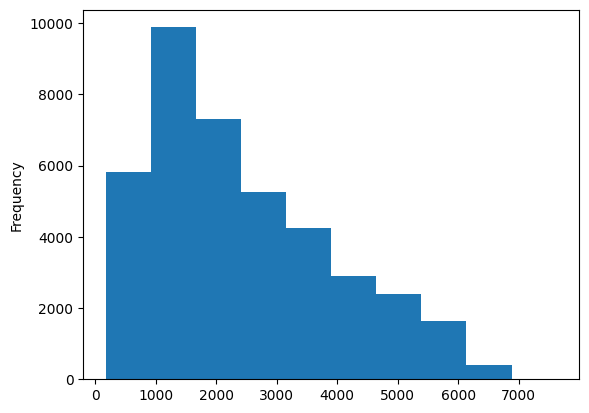

In [21]:
df['length'].plot(kind = 'hist')

<Axes: >

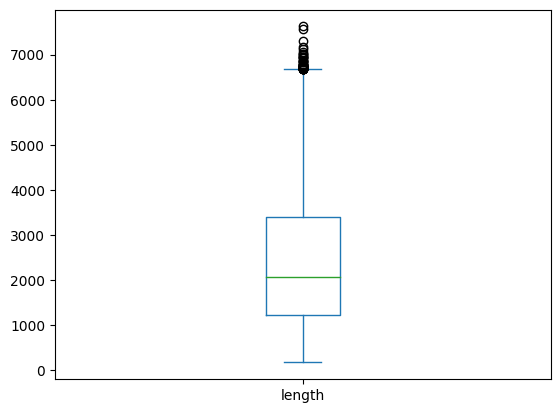

In [22]:
df['length'].plot(kind = 'box')

In [23]:
df.isnull().sum().sum()

0

In [24]:
df.duplicated().sum().sum()

0

In [25]:
sr = 'this is me me is ana'
sr_lst = sr.split()
sr_lst

['this', 'is', 'me', 'me', 'is', 'ana']

In [26]:
from collections import Counter
cnt = Counter()
cnt.update(sr_lst)

In [ ]:
cnt.most_common(2)

[('is', 2), ('me', 2)]

In [ ]:
text = df.text.str.split()

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:
Cnt = Counter()
Train['text'].apply(cnt.update)

TypeError: unhashable type: 'list'

In [ ]:
Cnt.most_common(30)

[('https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً"ْبَعيُدْاًّ عن اٌلسيطرة"ّ ًلِفرقةَ مَسّرُحَ ًاِلطِاٌئف،ّ ْمن ّتٌأٌليُف فُهًدِ ّرّدِةَ الحاّرثي، ّوٌإُخراًج َسٍاٌمَي ًصّاَلٍحٍ الزَهرانيّ،ْ ٌوُذّلكّ فٌيً َرٌابعٍةٌ ٌليالي ِالدورْةَ اَلأوٌلى ٌمن مًهرًجِانٌ اْلشْارِقُة لّلّمَسُرٌحْ الخليجي ٌ.تًبًدَأْ اْلْمسرٍحيٍة بثًلاٍثّة َأشخاٍصٍ ٍيجٍلْسِونَ ُفي قاعةِ مّكتبةِ،ٌ ًيِنهمُك كٌل َمْنهٌمٌ ّفي ُالقرِاءة بْشغَف،ِ ُثُم يبِدأِوْن ًفيَ الٍحوٌاُر لنٍكُتشُفُ ُأِنهمّ كاْنوّاٌ ْيِقُرَأّونْ ِروٍاياّت لُأستُاّذهم ًالكِاتِب اّلمٌبدَعَ ُالٍذيٍ مِاْت ُوْتِرْك ُرِوايٌاتَ فريَدَةً،ٍ ُرٌسم فْيهًا ِشْخُصًياُت ٍغاية فُي الُدُقٌة، ٌويتحدٌثونّ ْعنُ ضرورة تكِرٍيمَ ِأستْاّذُهًم،ٌ ويٍتِفِقون ُعُلْىّ طرٍيقّة ًخاصةّ َلًلتكرّيم وُهيٌ ِإُخرٍاّج ُشِخصِيٌاتَه ًمنُ ْرِواياٍتها ٍلٍتَعٍيٍش في ّاٍلوْاقًع، وِيًنتِقّونً شِخُصيًاتٌ مركزيُة، ٍأْولها ْاُلحِلاق ٍاٍلذي ٍكٍان ًطَيًبًاًُ،ٌ حْافٍظاً لأُسرّاٌ

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **Arabic stopwords loading**:
   We load a list of Arabic stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   - **Removing links (URLs)**: Any URLs present in the text are removed as they are not meaningful for classification purposes.
   - **Removing special characters and punctuation**: This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   - **Removing Arabic diacritics (Tashkeel) and elongated letters (Tatweel)**: Diacritical marks and elongated letters are stripped out to standardize the text.
   - **Removing Arabic stopwords**: Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   - **Stemming or Lemmmatization**: Either stemming or lemmatization is applied to reduce words to their root or base form.
   - **Normalizing Hamza**: Any variation of the Hamza character is normalized for consistency.

   **Note:** Most of these you can do using the library [PyArabic](https://pyarabic.readthedocs.io/ar/latest/README.html#features)

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [27]:
df[(df.length>=1000 )& (df.length <=3000)]

,text,label,length
2,https://example.com/resource/أُقيًمٌتِ مِساءُ َأمٍسٍ اٌلأَوٌل فيُ ِإكسّبٍو اٍلَشارًقّةٌ نِدٌوُة حوْاٌرَية حوْلِ أُهِمَيًة ًتٌجَاِرِةّ الكتٌب فيُ َالعالِمٍ َشًارك فيهًا ٍكلّ من ليَز ثومسٍوِنِ ًولُو...,Culture,2215
8,"https://example.com/resource/نظم ْمَرٍكزْ َاِلشارقة ِللًشِعٌر اْلَشعبيُ ّفُيْ مجُلس ضاحٌيْة مغّيّدر ٌبًالِطّلاعً،َ ندِوْةْ حْوٍارُية ُبعَنوان ""أْواْئل ّمقدٌمي اْلبٌراِمج َالشعٌبيٍة""،ّ ٍبًحًضّوّر ر...",Culture,2012
11,https://example.com/resource/علًاءً اٍلدٌينُ ٌمحمود لُمٌ يّكنٍ ّكٌاْرلٌ مٌاكسْ ٍ(ٌ18ٍ18ً ّ-ٌ 1ّ8ّ83ٌ)ُ،ِ إلٍا ّشاٌعِراًًّ، ّربَماّ كانت ِتّلْكً البدَايَةً المَخطَطةّ لُلفيلسوَفٌ ًاُلشٌاٌعِر اًلْأٌ...,Culture,2907
14,https://example.com/resource/بّحٌسبَ ِطبيعّة ُأداء الشعرٍاء ًوأسلوُب ٍكَلِ واُحدْ ُمْنًهمَ في َالقرًاءُةً ٌوْالَتعًبِير ْعنً نفُسًه فْقّدَ بداٍ اّلشعَرْاءّ َالأربعةِ،َ َاٍلذُيَنْ ٌأًقْامِ ّلهٌمْ َ...,Culture,2604
15,https://example.com/resource/اَلّشْاِرقِةّ:ً ميرِفّت الّخطٍيًبً تَلبية لدعوُة حٍرمْ ًصٌاٍحبَ الٌسْموّ اٌلشْيخُ اَلدِكتوٍر ُسًلٍطاٌن بن مِحمدْ اُلّقٌاسَمّي، ّسْمًوِ ًاْلًشِيًخًة ِجٌوٌاًهر ْبنُت محَ...,Culture,1431
...,...,...,...
39876,https://example.com/resource/أعُلنِتٌ مّجُمٍوعةَ الفٍطيَم ِأمْسِ اِسّتحُواذهاٍ عْلًىُ َفيْوٌتك لحْلٍوًل اَلبّرمّجياَت، ْشركُةٌ تكْنّولًوِجيٍاٌ ُالمعلّومّاْتّ ْاّلًمتكاَملْة ٍالمزوُدةٍ ُلٍلخٌدًماًت...,Tech,1962
39880,https://example.com/resource/أعلّنت شّركٌةً بّاَنِاسٌوَنُيّك عن اٍطَلاّقٌ ّسلُسًلة تلْفًزيوناتّ فييٍرا اُلُجًديدةٍ ًللعٍاًم َ20ً08 بّعدّ طوُلٍ انُتظٍاُر في ّمّنُطًقة ٌالشرْق ّاَلأُوًسطّ،َ واِلتَيٌ...,Tech,1112
39881,https://example.com/resource/بُتٍاَرٌيًخَ 28ْ ُمّارسٍ/ٍآذاٍر الماًضِي وّبَيّن ْالٌسّاعةٌ اُلْثُامنة وِاِلّنَصفٌ ٌمّساءِ ٍوحتَىٍ الٌتًاْسعْة واَلُنْصفً ِمسٍاءٌ،ْ ساّهم ِآَلاِف ٌالأٍشُخًاص فٌي ٌاَلْ...,Tech,1611
39882,https://example.com/resource/دبَيُ:َ «ُاَلخليجٍ» أَبرٍمِت بلدّية دبِيٌ مع بلدٍيَة رًأُسْ ُاَلخِيَمةُ اُتَفاِقَية ُمُشٌرْوِع َ«َمِكْاٌنيٍ» لُلّعنٍونِة ْالًجغْراِفْية، وجًاءْ ِذَلٌك عْلِىْ هاِمشَ ٍف...,Tech,1692


In [28]:
df_cutted = df[(df.length>=1000 )& (df.length <=3000)]

In [29]:
import nltk

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
#https://www.nltk.org/howto/portuguese_en.html#stopwords
stop_words =nltk.corpus.stopwords.words('arabic')

In [32]:
set_stop_words = set(stop_words)

In [144]:
from sklearn.model_selection import train_test_split

train_val , test = train_test_split(df_cutted , test_size = 0.05 , random_state = 42)
train , val = train_test_split(train_val , test_size = 0.05 , random_state = 42 )

In [145]:
import re
link_reg  = r"https?\S+|www.\S+|\S+\.com" #removing websites
sc_reg = r'[^\w\s]'  #removing special characters
number_reg = r'\d+' #removing numbers

removed = "|".join([link_reg,sc_reg,number_reg])

In [146]:
from pyarabic.araby import strip_tashkeel , strip_harakat , normalize_hamza , strip_tatweel

In [147]:
re.sub?

In [148]:
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()

In [ ]:
ISRIStemmer?

In [38]:
stemmer.stem('يلعب')

'لعب'

In [39]:
normalize_hamza?

In [149]:
def Preprocessing(text):
  text = re.sub(removed ,'', text)
  text = strip_harakat(text)
  text = strip_tashkeel(text)
  text = strip_tatweel(text)
  text2 = text.split()
  text = [word for word in text2 if word  not in set_stop_words]
  text = [stemmer.stem(word) for word in text2]
  text = normalize_hamza(text,'tasheel')
  return text

In [150]:
train['text'] = train['text'].apply(Preprocessing)


In [151]:
val['text'] = val['text'].apply(Preprocessing)

In [152]:
test['text'] = test['text'].apply(Preprocessing)

In [153]:
train.head()

,text,label,length
6194,بنك دبي الاسلامي افتتاحه فرعا جديدا في جميرا بيتش ريزيدنس منطقة مرسى دبي ويعد هذا الفرع ال لبنك دبي الاسلامي في دولة الامارات والفرع الخامس الذي يتم افتتاحه منذ بداية العام وقام خالد الكمده العضو ...,Finance,1795
34349,شركة بهارتي ايرتل الهندية للاتصالات امس انها اتفقت على شراء حصة في الماية في شركة وريد تليكوم ببنجلادش في اول صفقة استحواذ خارجي لها بعد ان فشلت في ابرام صفقة قيمتها مليار دولار مع شركة ام تي ان ب...,Tech,1761
22418,بابا الفاتيكان فرنسيس امس الاثنين عن خشيته من وقوع حرب نووية محذرا من ان العالم الان على مقربة شديدة من هذا الخطرتصريح البابا ياتي بعد يوم على انذار خاطي بوقوع هجوم وشيك بصاروخ بالستي على هاواي مم...,Politics,1432
16006,امين الجمالتبلغ نسبة المعرضين للاصابة بالامراض النفسية والعصبية فيما تبلغ نسبة المراجعين للعيادة النفسية داخل الدولة بينما تلتزم منهم نسبة فقط بالعلاج حسب ما كشف عنه الدكتور هاني الشافعي استاذ الا...,Medical,1703
10867,الخليجشهد سوق دبي المالي تداولات بقيمة مليار درهم بتنفيذ صفقة توزعت على مليون سهم واغلق الموشر على نقطة بانخفاض قدره نقطة عن اغلاقه السابق من اكثر الشركات ارتفاعا من حيث التغير في اسعارهاتكافل الا...,Finance,1908


# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [154]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['text'])

In [78]:
train['length'].max()

3000

In [155]:
encoder = LabelEncoder()
MAXLEN = 3000

In [158]:
VOCAB_SIZE = len(tokenizer.word_index) + 2

In [159]:
VOCAB_SIZE

183414

In [160]:
X_train , y_train  = train['text'] , train['label']
X_val , y_val = val['text'] , val['label']
X_test, y_test = test['text'] , test['label']

X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_val_tokenized = tokenizer.texts_to_sequences(X_val)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [161]:
#train
sequences_padded = pad_sequences(X_train_tokenized, maxlen=MAXLEN, padding='post')
y_train = encoder.fit_transform(y_train)

In [162]:
sequences_padded_val = pad_sequences(X_val_tokenized, maxlen=MAXLEN, padding='post')
y_val = encoder.fit_transform(y_val)

In [163]:
sequences_padded_test = pad_sequences(X_test_tokenized, maxlen=MAXLEN, padding='post')
y_test = encoder.fit_transform(y_test)

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional , LSTM

In [191]:
#Model Architectue
EMBEDDING = 25
model = Sequential(
    [
        Embedding(input_dim = VOCAB_SIZE , output_dim = EMBEDDING , input_shape =(MAXLEN,) ) ,
        Bidirectional(LSTM(units =150 , return_sequences = True , activation='tanh')),
        Bidirectional(LSTM(units =100 , return_sequences = True , activation='tanh')),
        Bidirectional(LSTM(units =50 , return_sequences = False , activation='tanh')),
        Dense(units = 10, activation ='relu') ,
        Dense(units = 7, activation ='softmax')
    ]
)

#Model Compiling

model.compile(optimizer = 'adam' , loss ='categorical_crossentropy' , metrics = ['acc'])


#Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)             │ (None, 3000, 25)            │       4,585,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_60 (Bidirectional)     │ (None, 3000, 300)           │         211,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_61 (Bidirectional)     │ (None, 3000, 200)           │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_62 (Bidirectional)     │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 7)                   │              77 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,218,837 (19.91 MB)

 Trainable params: 5,218,837 (19.91 MB)

 Non-trainable params: 0 (0.00 B)

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [65]:
import numpy as np

In [200]:
y_val.shape

(974,)

In [202]:
#Model training
history = model.fit(sequences_padded,
                    y_train,
                    epochs = 3 ,
                    validation_data=(sequences_padded_val , y_val ),
                    batch_size = 64)

Epoch 1/3


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 7)

# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here: